In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
class k_means_cluster:
    # Define the constructor function with tolerance and maximum iterations
    # Tolerance is by what percentage the centroid will move
    # Maximum iterations in sckikit learn is 300
    def __init__(self, k = 2, tolerance = 0.001, max_iterations = 300):
        self.k = k
        self.tolerance = tolerance
        self.max_iterations = max_iterations
        
    def fit(self, data):
        # Initialise a dictionary for centroids, as we don't know the values of the centroids
        self.centroids = {}
        # Get the pandas dataframe in the form of numpy array and add the values 
        # to the centroid dictionary.
        for i in range(self.k):
            # Initially assigning the first two [values] as the centroids, 
            # Could be any first 2 values, shuffle the data then assign
            self.centroids[i] = data[i]
                
        # Initialise the optimization process with maximum iterations
        for i in range(self.max_iterations):
            # Initialise a dictionary to keep the classifications as we don't know them yet
            # keys will be centroids and values will be the featuresets that are contained in those values
            # This will occur for every iteration, key will be 0,1 but value will change as the centroid moved
            self.classifications = {}
            for i in range(self.k):
                self.classifications[i] = []
            # Populate the classifiction empty list 
            # To find the distance between the points and cluster by choosing the nearest centroid
            for features in data:
                # Calculate the distances using numpy linear algebra function      
                # Creating a list that is populated with K nmber of values to the distance with the centroid
                distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances)) # Index value of the minimum distances
                # At every iteration, clear out the classification and redo the classification
                self.classifications[classification].append(features)
            # storing the values of centroid for inheritance
            # In order to to compare with the tolerance value
            previous_centroids = dict(self.centroids)
                
            # Average all of the classification by taking out the array values and re-calculate the centroids
            for classification in self.classifications:
                # It will store the values of all the datasets in that classification to find the new centroid
                # basically finding the mean of all the features 
                self.centroids[classification] = np.average(self.classifications[classification], axis = 0)
                
            # Take Optimized variable as true initially 
            isOptimized = True
                
            # Looping through the centroids 
            for centroid in self.centroids:
                original_centroid = previous_centroids[centroid]
                current_centroid = self.centroids[centroid]
                # Compare the original and current centroid with the tolerance
                if np.sum((current_centroid - original_centroid) / original_centroid * 100) > self.tolerance:
                    isOptimized = False
            # Break out of the loop if the result is optimal, when centroids doesn't change their posiitons much
            if isOptimized:
                break

        
        


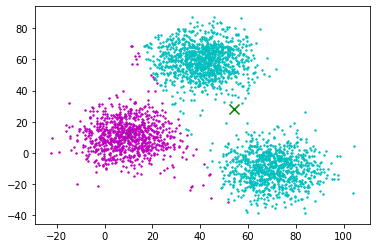

In [3]:
def main():
    dataFrame = pd.read_csv("kmeans.csv")
    dataFrame = dataFrame[['V1', 'V2']]
    # return pandas data
    data = dataFrame.values
    # Calling the classifier
    k_means = k_means_cluster()
    # Train that bad dude
    k_means.fit(data)
    
    # Plotting the graph here 
    colors = 10 * ["m", "c", "r", "g", "b", "k"]
    
    # Plot the centroid
    for centroid in k_means.centroids:
        plt.scatter(k_means.centroids[centroid][0], k_means.centroids[centroid][1], s = 100, color = "g", marker = "x")
        
    for classification in k_means.classifications:
        color = colors[classification]
        for features in k_means.classifications[classification]:
            plt.scatter(features[0], features[1], color = color, s = 2)
    plt.show()
    
if __name__ == "__main__":
	main()